In [5]:
# https://discuss.pytorch.org/t/i-have-3-gpu-why-torch-cuda-device-count-only-return-1/7245/4
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

__Python VERSION: 3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]
__pyTorch VERSION: 1.7.0
__CUDA VERSION
/usr/bin/sh: 1: nvcc: not found
__CUDNN VERSION: 8003
__Number CUDA Devices: 2
__Devices
Active CUDA Device: GPU 0
Available devices  2
Current cuda device  0


In [1]:
%load_ext autoreload
%autoreload 2

import os
import json
import main
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser

wandb: Currently logged in as: chucooleg (use `wandb login --relogin` to force relogin)


In [2]:
# arguments
parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter)
args = parser.parse_args('')

args.data_path = '../Raw_Datasets/3Attr-4Vals-2hat23Train-2hat12Val.json'
args.config_path = 'checkpoints/ContrastiveLearning-cardgame-Scaling-SecondPass/20210223-192624-CardGame:OR;attr3-val4;contrastive;lookupTable;d_model32;dot-product;params133.15K/config.json'
args.generate_full_matrix = True
args.checkpoint_dir = 'checkpoints'
args.mode = 'test_full'
args.gpu = 0
args.approve_before_training = False
args.runID = '28ig3igg'
args.project_name = "ContrastiveLearning-cardgame-Scaling-SecondPass"
args.ckpt_name = 'epoch=00-step=58999-val_loss=468.07.ckpt'

Global seed set to 42


---------data----------
num_attributes : 3
num_attr_vals : 4
key_support_size : 65
query_support_size : 4096
train_datapoints length : 8388608
val_datapoints length : 4096
sparsity_estimate : 0.17980795755722673
-----------------------
----------hparams----------
seed : 42
batch_size : 128
max_epochs : 1
d_model : 32
embed_dropout : 0.0
model : contrastive
embedding_by_property : False
encoder : lookup
decoder : lookup
d_ff : 1024
num_heads : 1
N_enc : 2
N_dec : 2
attn_wt_tying_scheme : untie_QKVO_zero_O
attn_wt_dropout : 0.0
heads_dropout : 0.0
pff_dropout : 0.0
representation_pos : 0
dotproduct_bottleneck : True
loss_temperature_const : 1.0
loss_smoothing_const : 0.1
nonlinear_classifier_scale_down_factor : [2, 1]
adam_lr : 0.001
adam_beta1 : 0.9
adam_beta2 : 0.999
adam_epsilon : 1e-08
adam_weight_decay : 0
scheduled_adam_beta1 : 0.9
scheduled_adam_beta2 : 0.98
scheduled_adam_epsilon : 1e-09
scheduled_adam_warmup_steps : 4000
gradient_clip_val : 0
debug : False
key_support_size : 65


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing:   0%|          | 0/32 [00:00<?, ?it/s]

/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 100%|██████████| 32/32 [00:18<00:00,  1.77it/s]


/home/user/miniconda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The testing_epoch_end should not return anything as of 9.1. To log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'avg_test_NullQueries_accuracy_by_Query': 1.0,
 'avg_test_NullQueries_accuracy_by_QueryKey': 1.0,
 'avg_test_NullQueries_f1_by_Query': 1.0,
 'avg_test_NullQueries_f1_by_QueryKey': 1.0,
 'avg_test_NullQueries_precision_by_Query': 1.0,
 'avg_test_NullQueries_precision_by_QueryKey': 1.0,
 'avg_test_NullQueries_recall_by_Query': 1.0,
 'avg_test_NullQueries_recall_by_QueryKey': 1.0,
 'avg_test_accuracy_by_Query': 0.9988018274307251,
 'avg_test_accuracy_by_QueryKey': 0.9988018274307251,
 'avg_test_f1_by_Query': 0.9988530874252319,
 'avg_test_f1_by_QueryKey': 0.9966561794281006,
 'avg_test_nonNullQueries_accuracy_by_Query': 0.9979274868965149,
 'avg_test_nonNullQueries_accuracy_by_QueryKey': 0.9979275465011597,
 'avg_test_nonNullQueries_f1_by_Query': 0.9980161190032959,
 'avg_test_nonNullQueries_f1_by_QueryKey': 0.9965305328369141,
 'avg_test_nonNullQueries_precision_by_Query': 1.0,
 'a

/home/user/miniconda/lib/python3.8/site-packages/torch/nn/functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


(ContrastiveTrainModule(
   (metrics): ThresholdedMetrics()
   (model): EncoderPredictor(
     (inp_query_layer): Sequential(
       (scaled_embed): ScaledEmbedding(
         (embedding): Embedding(4096, 32)
       )
       (embed_dropout): Dropout(p=0.0, inplace=False)
     )
     (inp_key_layer): Sequential(
       (scaled_embed): ScaledEmbedding(
         (embedding): Embedding(65, 32)
       )
       (embed_dropout): Dropout(p=0.0, inplace=False)
     )
   )
   (loss_criterion): InfoCELoss(
     (CE_loss): CrossEntropyLoss()
   )
   (softmax): Softmax(dim=1)
 ),
 <datamodule.GameDataModule at 0x7faca35cf070>)

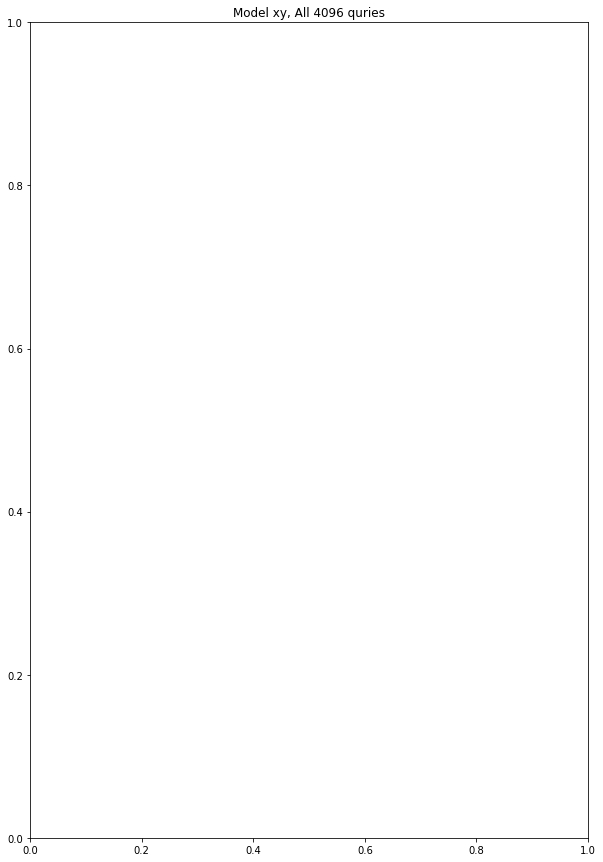

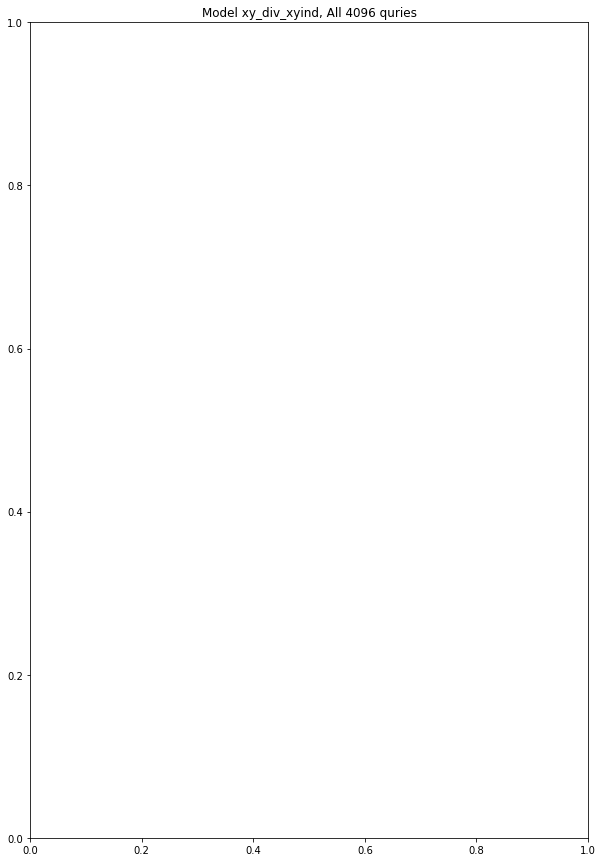

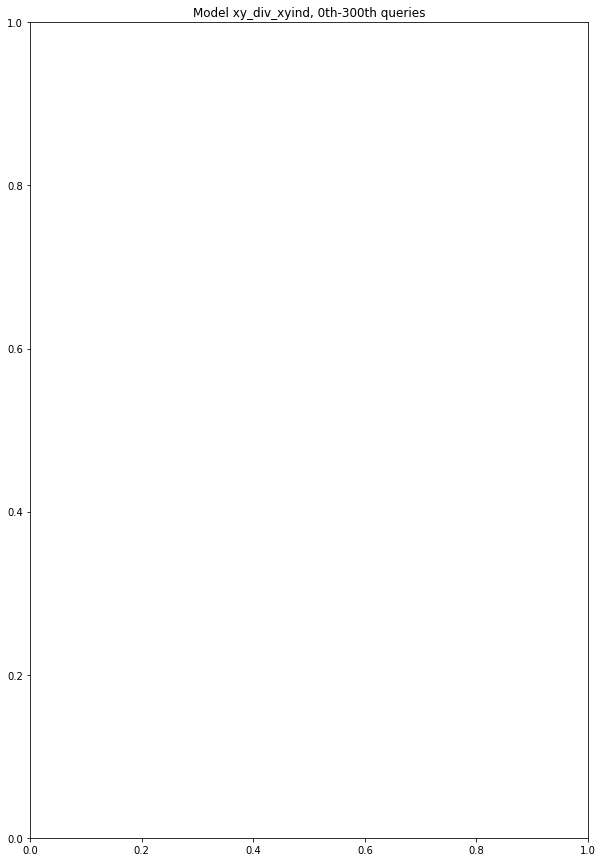

<Figure size 720x1080 with 0 Axes>

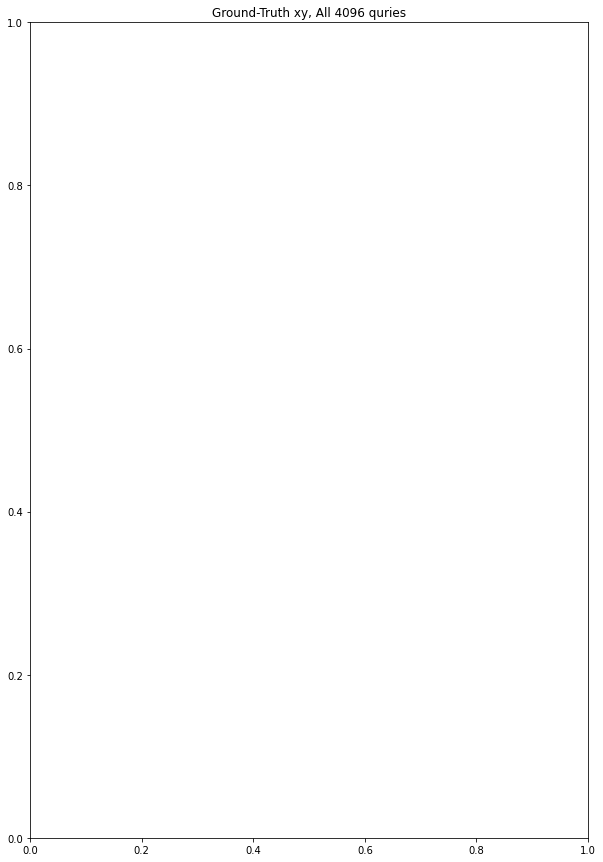

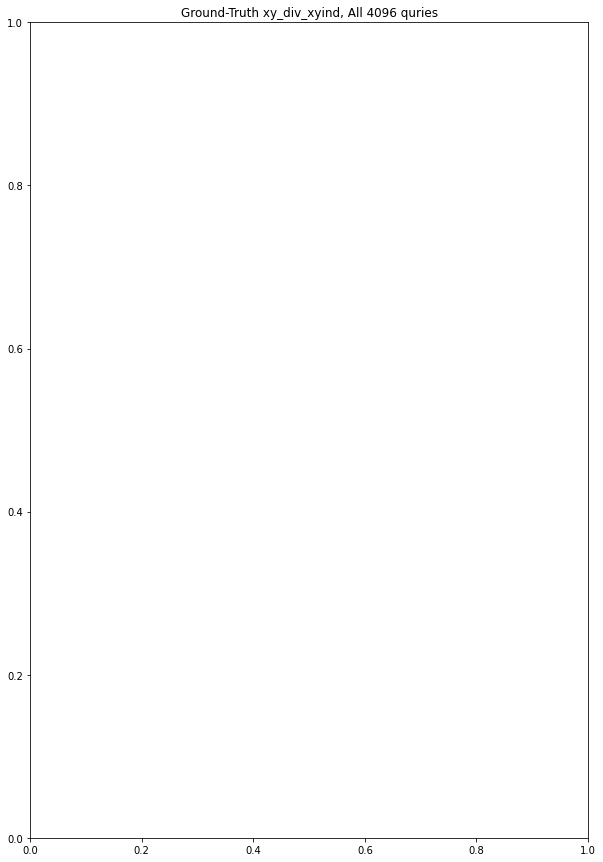

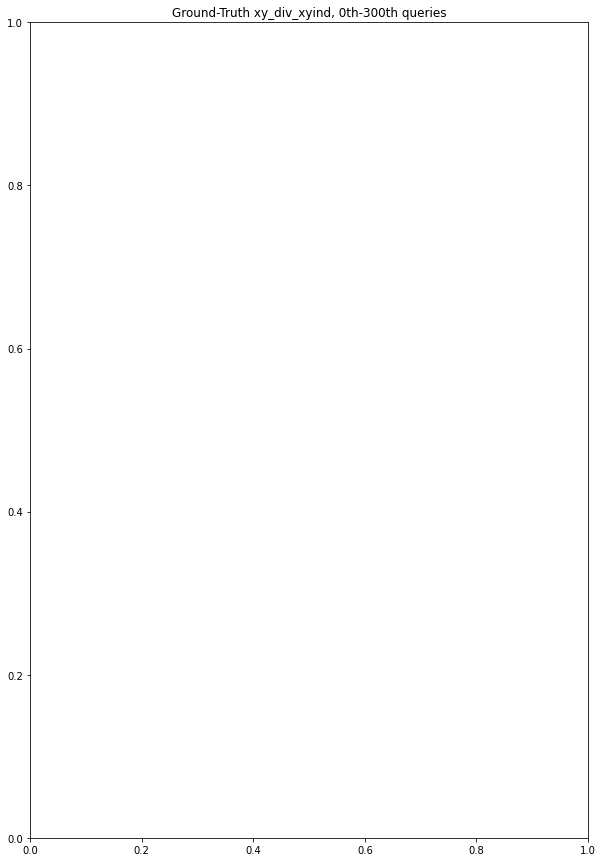

<Figure size 720x1080 with 0 Axes>

In [3]:
main.main(args)